# Full Ising model simulation for branch structure

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from utils.gen_utils import create_lattice, graph_to_model_format, autocorr
from IsingModel import IsingModel
from main_tree import simulate_ising_model

from branch_sim import MamSimulation

In [69]:
## set the parameters

tmax = 150

J = 1.0
n_equilib_steps = 4_000
n_mcmc_steps = 10_000
n_samples = None
n_sample_interval = 10
step_algorithm = "wolff"
betas = [0.3,0.35, 0.4, 0.45,0.5,0.6,0.8]

In [70]:
## simulate the stucture
mam = MamSimulation(tmax=tmax)
coordinates, evolve, G = mam.simulate()
nodes, neighbors = graph_to_model_format(G)
print(nodes.shape)

Starting simulation...


100%|██████████| 150/150 [00:00<00:00, 334.84it/s] 


Branch growth simulation completed in 0.4498898983001709 seconds
(1510,)


## Thermolization

In [71]:
init_types = {
    "random": np.random.choice([-1, 1], size=nodes.size),
    "aligned": np.ones(nodes.size, dtype=np.int8)
}
results = {}
results_mcmc = {}
for beta in betas:
    for init_type, init_spins in init_types.items():
        if init_type == "random":
            init_spins = np.random.choice([-1, 1], size=nodes.size)
        elif init_type == "aligned":
            init_spins = np.ones(nodes.size, dtype=np.int8)
        
        model = IsingModel(
            nodes=init_spins,
            neighbors=neighbors,
            temp = 1/beta,
            J=J,
            n_equilib_steps=n_equilib_steps,
            n_mcmc_steps=n_mcmc_steps,
            n_samples=n_samples,
            n_sample_interval=n_sample_interval,
            step_algorithm=step_algorithm
        )

        model = simulate_ising_model(model)
        results[(beta, init_type)] = (model.energy_equil, model.magn_equil)
        results_mcmc[(beta, init_type)] = (model.energy_all, model.magn_all)
        

Time taken:  1.628819227218628
Time taken:  1.5264701843261719
Time taken:  1.5666561126708984
Time taken:  1.6011340618133545
Time taken:  1.5696990489959717
Time taken:  1.527250051498413
Time taken:  1.5344579219818115
Time taken:  1.5528771877288818
Time taken:  1.5279600620269775
Time taken:  1.5228385925292969
Time taken:  1.5912628173828125
Time taken:  1.5440330505371094
Time taken:  1.5650391578674316
Time taken:  1.575563907623291


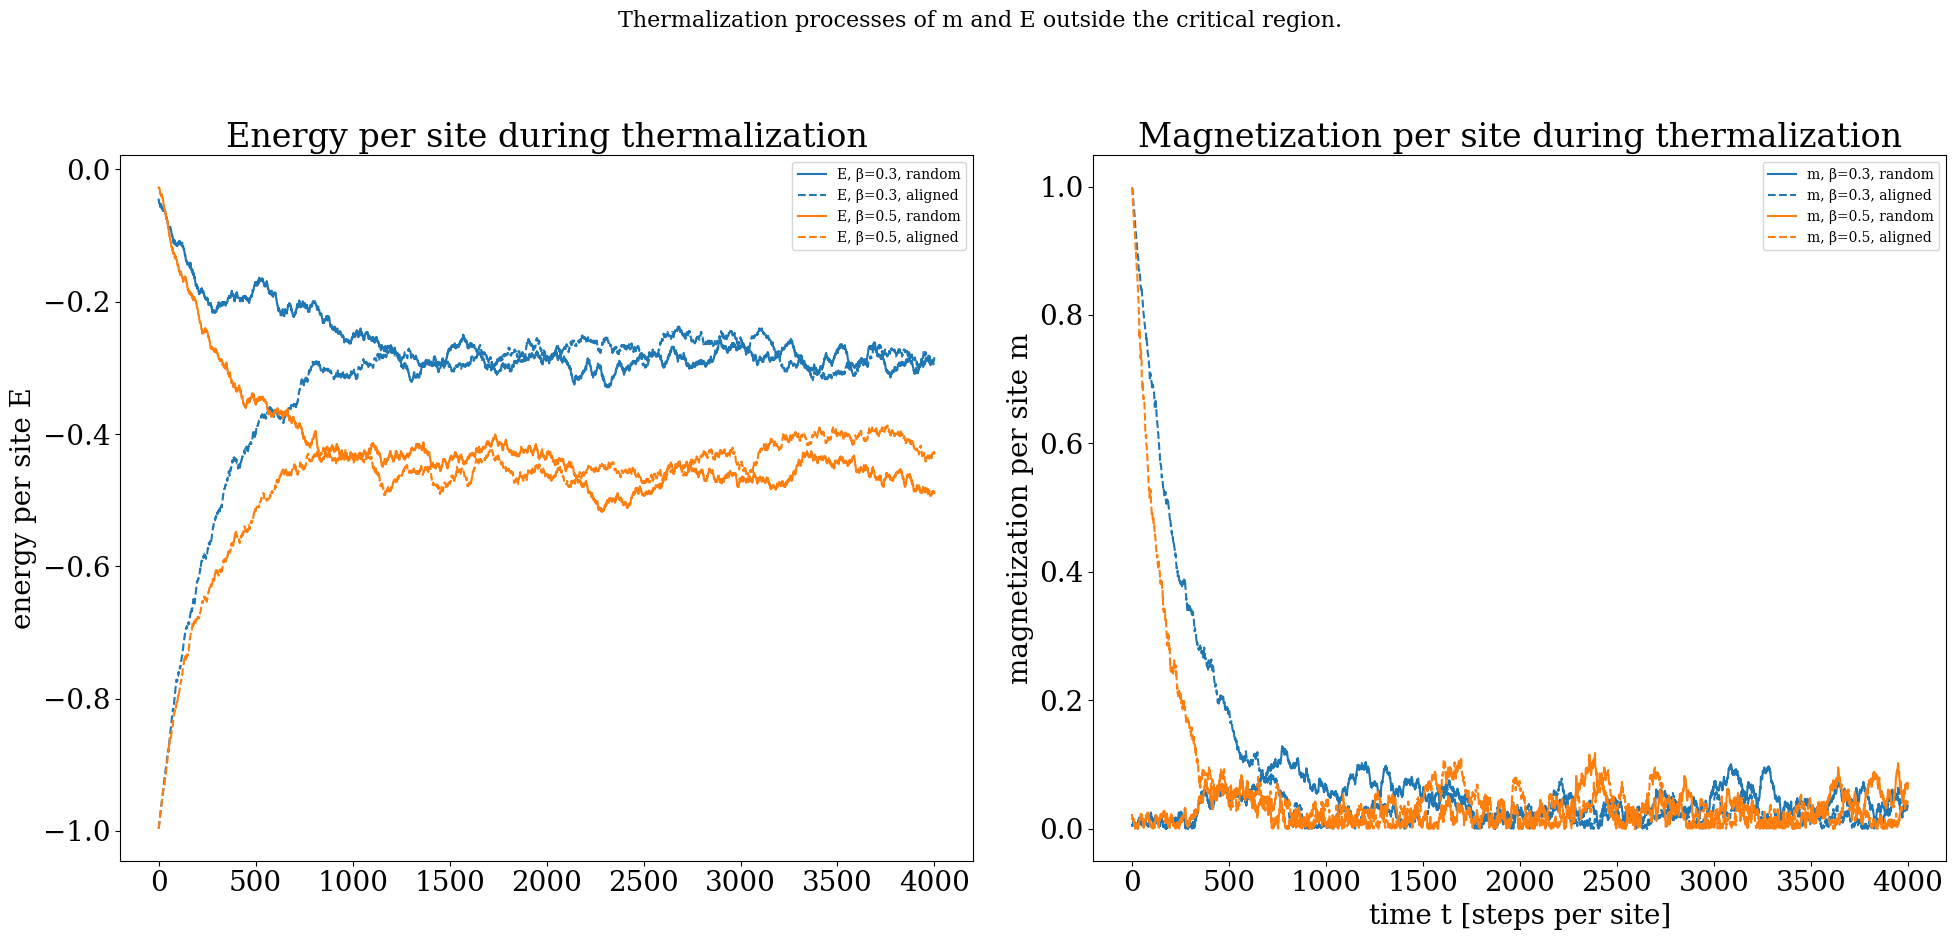

In [72]:
### Plotting the results ###

max_timestep = 4_000

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)
betas = [0.3, 0.4, 0.45]
betas = [0.3,0.5]

# Define colors for betas and linestyles for init_types
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
beta_colors = colors[:len(betas)]
init_linestyles = ['-', '--']  # One linestyle per init_type

# First subplot: Energy per site
for idx, beta in enumerate(betas):
    for init_idx, (init_name, _) in enumerate(init_types.items()):
        energy, _ = results[(beta, init_name)]
        axes[0].plot(energy[:max_timestep], 
                     color=beta_colors[idx], 
                     linestyle=init_linestyles[init_idx], 
                     label=f"E, β={beta}, {init_name}")

axes[0].set_ylabel("energy per site E")
axes[0].legend(fontsize=10)
axes[0].set_title("Energy per site during thermalization")

# Second subplot: Magnetization per site
for idx, beta in enumerate(betas):
    for init_idx, (init_name, _) in enumerate(init_types.items()):
        _, magn = results[(beta, init_name)]
        axes[1].plot(magn[:max_timestep], 
                     color=beta_colors[idx], 
                     linestyle=init_linestyles[init_idx], 
                     label=f"m, β={beta}, {init_name}")

axes[1].set_xlabel("time t [steps per site]")
axes[1].set_ylabel("magnetization per site m")
axes[1].legend(fontsize=10)
axes[1].set_title("Magnetization per site during thermalization")

plt.suptitle("Thermalization processes of m and E outside the critical region.", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

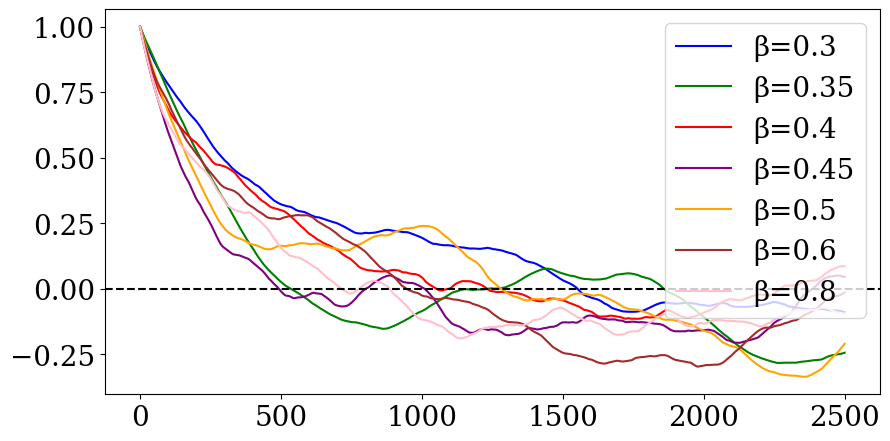

In [74]:
from utils.gen_utils import autocorr
plt.figure(figsize=(10,5))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink']

betas = [0.3,0.35, 0.4, 0.45,0.5,0.6,0.8]
init_style = "random"
# energy autocorrelation
for i, beta in enumerate(betas):
    corr = autocorr(results_mcmc[(beta, init_style)][0])
    corr = corr[:]
    plt.plot(corr, color=colors[i], label=f'β={beta}')

# draw horizontal line at 0.0
plt.axhline(y=0.0, color='black', linestyle='--')
plt.legend()
plt.show()

In [ ]:
tmax = 150
temps = np.linspace(0.01, 2.0, 200)
n_sample_interval = 1500 # look at autocorrelation
n_equilib_steps = 2_000 # look at thermalization
n_mcmc_steps = 150_000 # gives us 200 samples
n_samples = None 

magn, energy, specific_heat, susceptibility = [], [], [], []

for T in temps:
    nodes = np.random.choice([-1, 1], size=nodes.size)
    model = IsingModel(
        nodes=nodes,
        neighbors=neighbors,
        temp=T,
        J=1.0,
        n_equilib_steps=n_equilib_steps,
        n_mcmc_steps=n_mcmc_steps,
        n_samples=n_samples,
        n_sample_interval=n_sample_interval,
        step_algorithm=step_algorithm
    )
    model = simulate_ising_model(model)
    magn.append(model.avg_magn)
    energy.append(model.avg_energy)
    specific_heat.append(model.specific_heat)
    susceptibility.append(model.susceptibility)

Time taken:  257.2449281215668
Time taken:  260.0726749897003
Time taken:  260.2553811073303
Time taken:  262.82630920410156
Time taken:  259.655739068985
Time taken:  255.4053246974945
Time taken:  260.72882103919983
Time taken:  260.2337501049042
Time taken:  719.344419002533
Time taken:  800.4839401245117
Time taken:  372.2413721084595
Time taken:  376.4110379219055
Time taken:  373.75415992736816
Time taken:  372.47406792640686
Time taken:  365.5043249130249
Time taken:  372.46342182159424
Time taken:  449.01514196395874
Time taken:  464.71083426475525
Time taken:  429.7333538532257
Time taken:  767.0797822475433
Time taken:  362.11332988739014
Time taken:  729.2416489124298
Time taken:  362.788361787796
Time taken:  313.140567779541
Time taken:  240.6605167388916
Time taken:  243.5850579738617
Time taken:  283.18090200424194


In [25]:
tmax

50

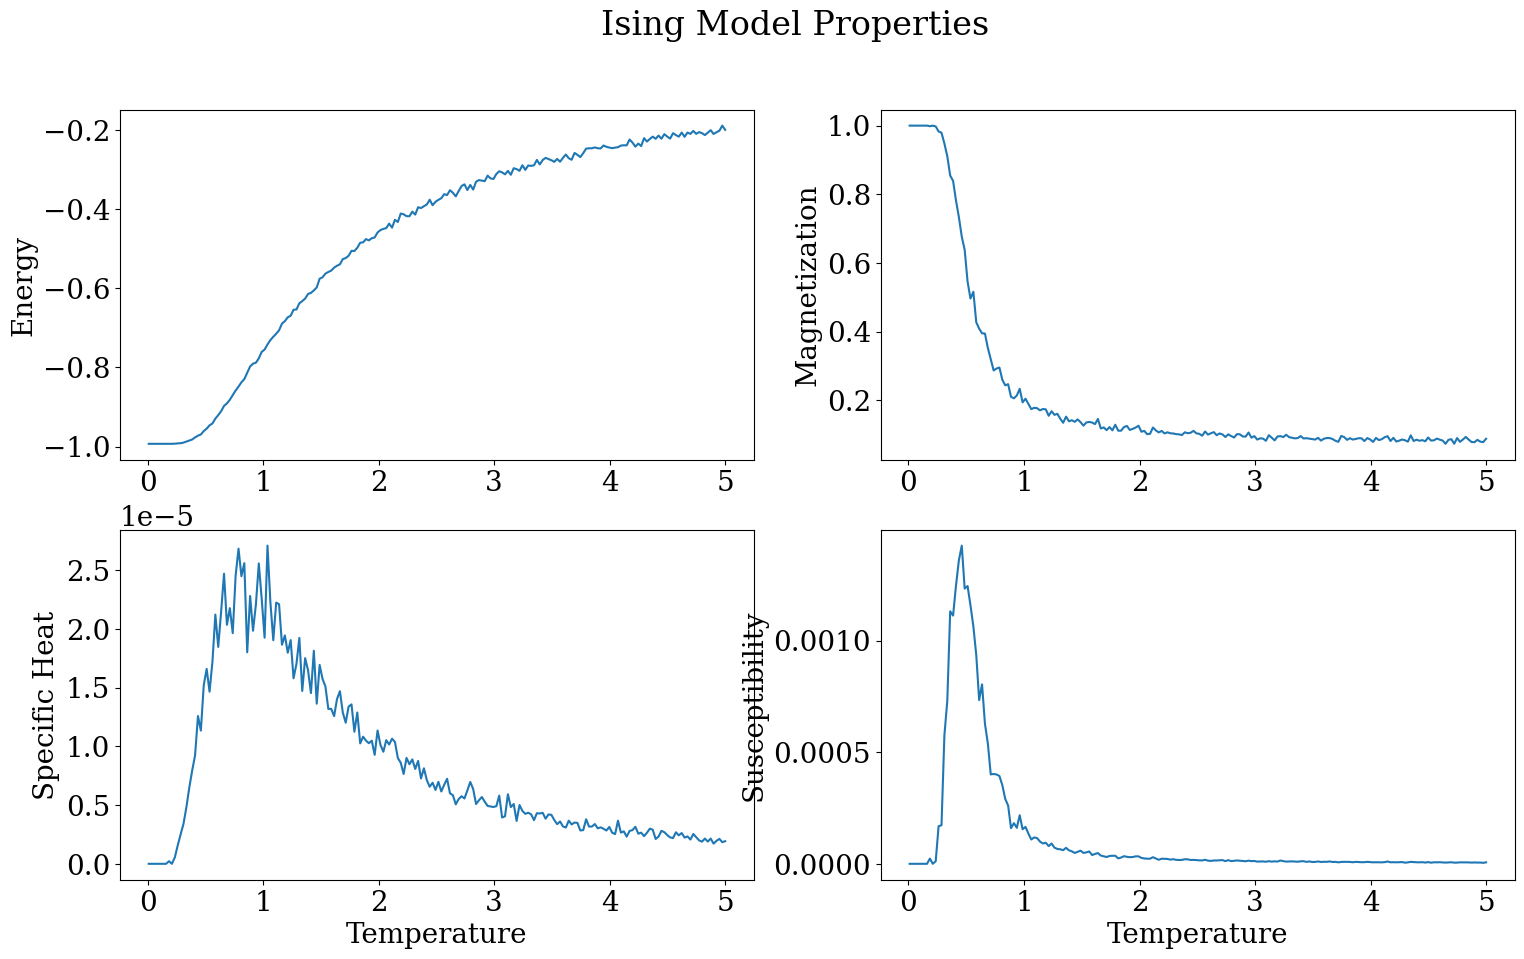

In [26]:
from utils.gen_utils import plot_magn_energy_spech_susc
plot_magn_energy_spech_susc(
    magn=magn,
    energy=energy,
    specific_heat=specific_heat,
    susceptibility=susceptibility,
    temps=temps,
    show=True
)